In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
du = 0.25 # meters
N = 32

In [3]:
u1 = du * np.array([1, 0])
u2 = du * np.array([0, 1])

In [4]:
us = np.array([u1*i + u2*j for i in range(-N//2, N//2-1+1) for j in range(-N//2, N//2-1+1)])

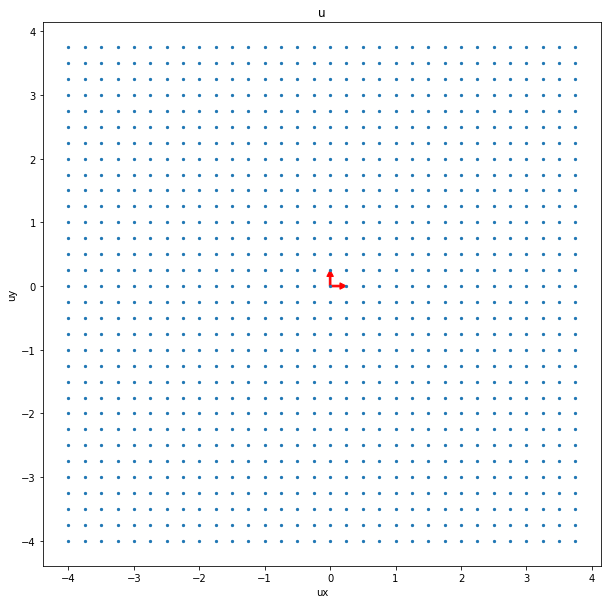

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(us[:,0], us[:,1], s=5)
plt.title("u")
plt.xlabel("ux")
plt.ylabel("uy")
arrowScale = 2*du
plt.arrow(0,0, u1[0], u1[1],
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.arrow(0,0, u2[0], u2[1], 
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)

In [6]:
# Next compute q distribution
# Note that du/dq should be close to L*lambda/(2 pi),
# but we'll add in some distortion to make things interesting.
L = 1.234*8.36
lam = 750e-9 # i-band
dudq = L*lam/(2*np.pi) * np.array([[1.1, 0.3], [0.3, 0.9]])
dqdu = np.linalg.inv(dudq)

q1 = dqdu[0,0]*u1 + dqdu[0,1]*u2
q2 = dqdu[1,0]*u1 + dqdu[1,1]*u2

qs = np.array([q1*i + q2*j for i in range(-N//2, N//2-1+1) for j in range(-N//2, N//2-1+1)])

(-4985249.98372465, 4804788.4458522638)

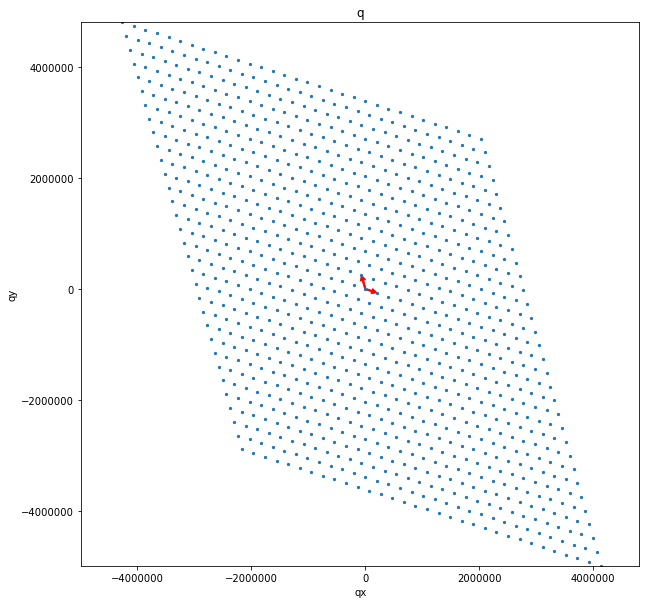

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(qs[:,0], qs[:,1], s=5)
plt.title("q")
plt.xlabel("qx")
plt.ylabel("qy")

arrowScale = np.linalg.norm(q1) + np.linalg.norm(q2)

plt.arrow(0,0, q1[0], q1[1],
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.arrow(0,0, q2[0], q2[1], 
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.xlim(np.min(qs), np.max(qs))
plt.ylim(np.min(qs), np.max(qs))

In [8]:
# Now for x-space.  We use the reciprical lattice vectors for this.
norm = 2*np.pi/(q1[0]*q2[1] - q1[1]*q2[0])/N
x1 = norm*np.array([q2[1], -q2[0]])
x2 = norm*np.array([q1[1], -q1[0]])

xs = np.array([x1*i + x2*j for i in range(-N//2, N//2-1+1) for j in range(-N//2, N//2-1+1)])

(-2.1373959750000001e-05, 2.0600241749999999e-05)

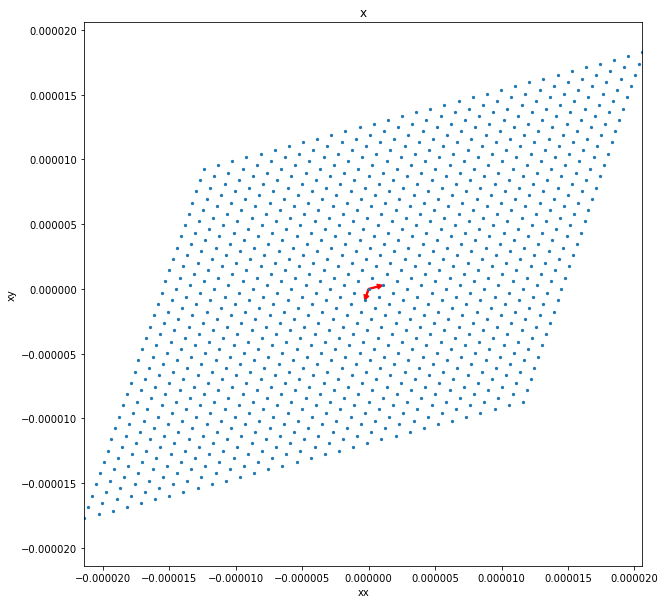

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(xs[:,0], xs[:,1], s=5)
plt.title("x")
plt.xlabel("xx")
plt.ylabel("xy")

arrowScale = np.linalg.norm(x1) + np.linalg.norm(x2)

plt.arrow(0,0, x1[0], x1[1],
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.arrow(0,0, x2[0], x2[1], 
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.xlim(np.min(xs), np.max(xs))
plt.ylim(np.min(xs), np.max(xs))

In [10]:
# And on to the sky.
dthdx = 1/L * np.array([[1.03, 0.03],[0.2, 1.3]])

# but what if dthdx propto dqdu?  Note that dqdu is propto 2*np.pi/(L*lam), but we want
# dthdx propto 1/L, so we multiply by lam/(2*np.pi)
# dthdx = dqdu * lam/(2*np.pi)

th1 = dthdx[0,0]*x1 + dthdx[0,1]*x2
th2 = dthdx[1,0]*x1 + dthdx[1,1]*x2

ths = np.array([th1*i + th2*j for i in range(-N//2, N//2-1+1) for j in range(-N//2, N//2-1+1)])

(-0.40921686843750016, 0.42522818906250015)

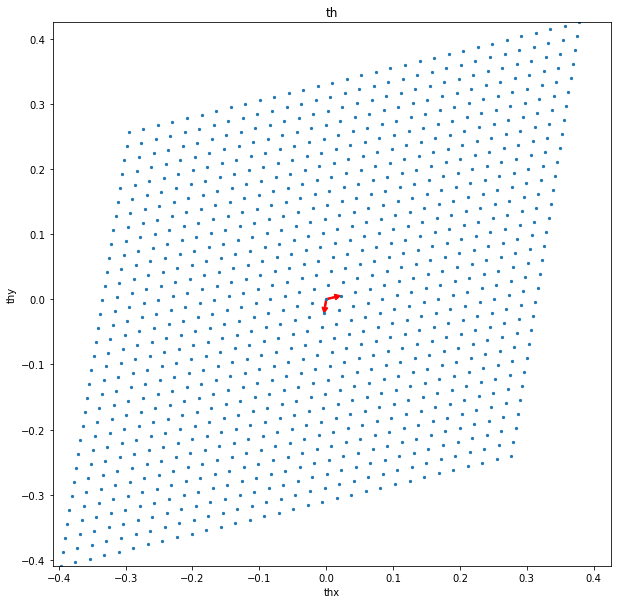

In [11]:
thas = ths * 206265 # arcsec
tha1 = th1 * 206265
tha2 = th2 * 206265

plt.figure(figsize=(10,10))
plt.scatter(thas[:,0], thas[:,1], s=5)
plt.title("th")
plt.xlabel("thx")
plt.ylabel("thy")

arrowScale = np.linalg.norm(tha1) + np.linalg.norm(tha2)

plt.arrow(0,0, tha1[0], tha1[1],
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.arrow(0,0, tha2[0], tha2[1], 
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.xlim(np.min(thas), np.max(thas))
plt.ylim(np.min(thas), np.max(thas))

In [12]:
# And now inverse sky-space.  Again use reciprical lattice vectors.
norm_sky = 2*np.pi/(th1[0]*th2[1] - th1[1]*th2[0])/N
k1 = norm_sky*np.array([th2[1], -th2[0]])
k2 = norm_sky*np.array([th1[1], -th1[0]])

ks = np.array([k1*i + k2*j for i in range(-N//2, N//2-1+1) for j in range(-N//2, N//2-1+1)])

(-186.11682834341676, 179.10888228300976)

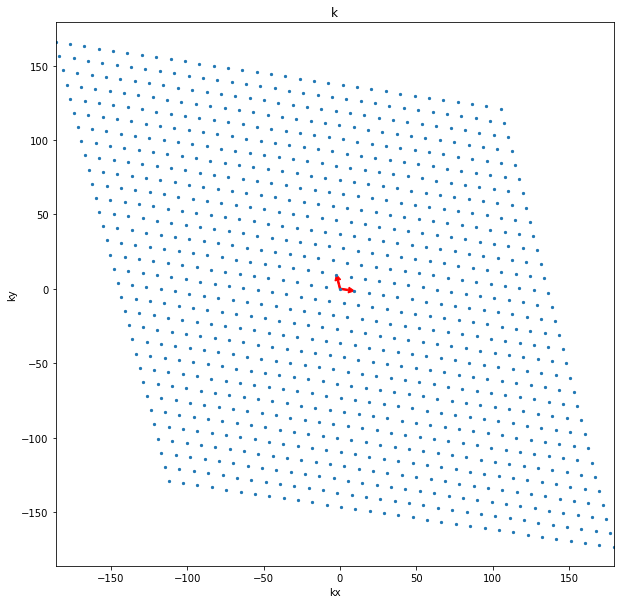

In [13]:
kas = ks / 206265 # inverse arcsec
ka1 = k1 / 206265
ka2 = k2 / 206265

plt.figure(figsize=(10,10))
plt.scatter(kas[:,0], kas[:,1], s=5)
plt.title("k")
plt.xlabel("kx")
plt.ylabel("ky")

arrowScale = np.linalg.norm(ka1) + np.linalg.norm(ka2)

plt.arrow(0, 0, ka1[0], ka1[1],
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.arrow(0, 0, ka2[0], ka2[1], 
          width=0.05*arrowScale, 
          head_length=0.2*arrowScale, 
          head_width=0.2*arrowScale, 
          color='r', length_includes_head=True, zorder=0)
plt.xlim(np.min(kas), np.max(kas))
plt.ylim(np.min(kas), np.max(kas))